In [1]:
from graph_2_mol import *
from mol_2_nx import *

In [2]:
with open('cluster_1_graphs.txt','r') as ff:
    line = ff.readline()

In [3]:
print(line)
mol,mol_smiles,idx_to_info = get_mol_from_graph(line)

Scaffold_1	O=C1OC(CC)CC=CC(O)C(C(OC)C(CCC(=O)C(C(O)CC(=O)C1)C)C)C	{30}{0.C:Methylmalonyl-CoA:IC(C(C)F)=O:0:C:6:0:SP2:0:0:false}{1.C:Methylmalonyl-CoA:IC(C(C)F)=O:0:C:6:0:SP3:1:0:false}{2.C:Methylmalonyl-CoA:IC(C(C)F)=O:0:C:6:0:SP3:3:0:false}{3.O:Methylmalonyl-CoA:IC(C(C)F)=O:0:O:8:0:PLANAR3:0:0:false}{4.C:Malonyl-CoA:IC(CF)=O:1:C:6:0:SP2:0:0:false}{5.C:Malonyl-CoA:IC(CF)=O:1:C:6:0:SP3:2:0:false}{7.C:Malonyl-CoA:IC(CF)=O:2:C:6:0:SP2:0:0:false}{8.C:Malonyl-CoA:IC(CF)=O:2:C:6:0:SP3:2:0:false}{9.O:Malonyl-CoA:IC(CF)=O:2:O:8:0:SP2:0:0:false}{10.C:Methylmalonyl-CoA:IC(C(C)F)=O:3:C:6:0:SP2:0:0:false}{11.C:Methylmalonyl-CoA:IC(C(C)F)=O:3:C:6:0:SP3:1:0:false}{12.C:Methylmalonyl-CoA:IC(C(C)F)=O:3:C:6:0:SP3:3:0:false}{13.O:Methylmalonyl-CoA:IC(C(C)F)=O:3:O:8:0:PLANAR3:0:0:false}{14.C:Methylmalonyl-CoA:IC(C(C)F)=O:4:C:6:0:SP2:0:0:false}{15.C:Methylmalonyl-CoA:IC(C(C)F)=O:4:C:6:0:SP3:1:0:false}{16.C:Methylmalonyl-CoA:IC(C(C)F)=O:4:C:6:0:SP3:3:0:false}{18.C:Malonyl-CoA:IC(CF)=O:5:C:6:0:SP2:0:0:false

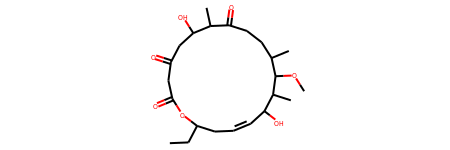

In [4]:
#print(mol)
#Draw the molecule
from rdkit.Chem.Draw import IPythonConsole #Needed to show molecules
from rdkit.Chem.Draw.MolDrawing import MolDrawing, DrawingOptions #Only needed if modifying defaults
from rdkit.Chem import AllChem
DrawingOptions.bondLineWidth=1.8
DrawingOptions.atomLabelFontSize=24
mol

In [5]:
#G = mol_to_nx(mol)

In [6]:
#from pyvis import network as net
#import networkx as nx
#g=net.Network(notebook=True,height="750px", width="100%")
#g.from_nx(G)
#g.show('molecule.html')

In [7]:
print(idx_to_info)

{0: ['0.C', 'Methylmalonyl-CoA', 'IC(C(C)F)=O', '0'], 1: ['1.C', 'Methylmalonyl-CoA', 'IC(C(C)F)=O', '0'], 2: ['2.C', 'Methylmalonyl-CoA', 'IC(C(C)F)=O', '0'], 3: ['3.O', 'Methylmalonyl-CoA', 'IC(C(C)F)=O', '0'], 4: ['4.C', 'Malonyl-CoA', 'IC(CF)=O', '1'], 5: ['5.C', 'Malonyl-CoA', 'IC(CF)=O', '1'], 6: ['7.C', 'Malonyl-CoA', 'IC(CF)=O', '2'], 7: ['8.C', 'Malonyl-CoA', 'IC(CF)=O', '2'], 8: ['9.O', 'Malonyl-CoA', 'IC(CF)=O', '2'], 9: ['10.C', 'Methylmalonyl-CoA', 'IC(C(C)F)=O', '3'], 10: ['11.C', 'Methylmalonyl-CoA', 'IC(C(C)F)=O', '3'], 11: ['12.C', 'Methylmalonyl-CoA', 'IC(C(C)F)=O', '3'], 12: ['13.O', 'Methylmalonyl-CoA', 'IC(C(C)F)=O', '3'], 13: ['14.C', 'Methylmalonyl-CoA', 'IC(C(C)F)=O', '4'], 14: ['15.C', 'Methylmalonyl-CoA', 'IC(C(C)F)=O', '4'], 15: ['16.C', 'Methylmalonyl-CoA', 'IC(C(C)F)=O', '4'], 16: ['18.C', 'Malonyl-CoA', 'IC(CF)=O', '5'], 17: ['19.C', 'Malonyl-CoA', 'IC(CF)=O', '5'], 18: ['20.O', 'Malonyl-CoA', 'IC(CF)=O', '5'], 19: ['21.C', 'Methylmalonyl-CoA', 'IC(C(C)F)=

In [8]:
from pyvis.network import Network
import matplotlib
import random

color_dict = matplotlib.colors.cnames
color_names = list(color_dict.keys())

g1 = Network(height="750px", width="100%",notebook=True)

#get all the typs
all_typs = []
all_orders = []
all_keys = []
for atom in mol.GetAtoms():
    idx = atom.GetIdx()
    info = idx_to_info[idx]
    typ = info[1]
    order = info[3]
    if info[1] not in all_typs:
        all_typs.append(typ)
    if order not in all_orders:
        all_orders.append(order)
    key = typ+","+order
    if key not in all_keys:
        all_keys.append(key)


use_typ_and_order = True

cdict = {}
if(len(all_keys)<len(color_names)):  #a color for every typ,order combination
    col_indices = random.sample(range(1, len(color_names)), len(all_keys))
    for i,key in enumerate(all_keys): 
        col_idx = col_indices[i]
        col = color_names[col_idx]
        cdict[key] = col
        i += 1
else:                  #too many typ,order combinations, so a color for every typ.
    cdict = {}
    col_indices = random.sample(range(1, len(color_names)), len(all_typs))
    for i,typ in enumerate(all_typs):
        col_idx = col_indices[i]
        col = color_names[col_idx]
        cdict[typ] = col
    use_typ_and_order = False
    
#print(all_typs)
#print(all_orders)
#print(cdict)
    
for atom in mol.GetAtoms():
    idx = atom.GetIdx()
    info = idx_to_info[idx]
    ID = info[0]
    typ = info[1]
    order = info[3]
    if use_typ_and_order:
        key = typ+","+order
        g1.add_node(n_id=idx,label=ID,title=typ+','+order,color=cdict[key])
    else:
        key = typ
        g1.add_node(n_id=idx,label=ID,title=typ+','+order,color=cdict[key])

for bond in mol.GetBonds():
    atom1 = bond.GetBeginAtomIdx()
    atom2 = bond.GetEndAtomIdx()
    bond_type = bond.GetBondType()
    g1.add_edge(atom1,atom2,value=bond_type,color='black')

g1.show('molecule.html')

In [10]:
cluster_info = {}
for atom in mol.GetAtoms():
    #print('for idx = ',idx)
    idx = atom.GetIdx()
    info = idx_to_info[idx]
    ID = info[0]
    typ = info[1]
    order = info[3]
    key = typ+","+order
    if key in cluster_info:
        node_list = cluster_info[key]
        if idx not in node_list:
            #check if idx is reachable from nodes already in node_list
            bonds = atom.GetBonds()
            reachable_atoms = [] #atoms reachable from this atom
            for b in bonds :
                idx1 = b.GetBeginAtomIdx()
                idx2 = b.GetEndAtomIdx()
                if idx1==idx:
                    reachable_atoms.append(idx2)
                else:
                    reachable_atoms.append(idx1)
                #print(reachable_atoms)
            #at least one atom in node_list should be in reachable.
            reachable = False
            for at in node_list:
                if at in reachable_atoms:
                    reachable = True
                    break
            if not reachable:
                print("Clustering error for atom ",idx,info)
            node_list.append(idx)
    else:
        node_list = []
        node_list.append(idx)
        cluster_info[key] = node_list
    #print(cluster_info)
    #print('------------------------')
        

In [14]:
print(cluster_info)
g2 = Network(height="750px", width="100%",notebook=True)

c_map = {}
n_idx = 0;
for key,cluster in cluster_info.items():
    g2.add_node(n_id=n_idx,label=key)
    c_map[key] = n_idx
    n_idx += 1
    
    
for key1,cluster1 in cluster_info.items():
    c_id1 = c_map[key1]
    for key2,cluster2 in cluster_info.items():
        c_id2 = c_map[key2]
        if key1==key2:
            continue
        edge_exists = False
        for idx1 in cluster1:
            for idx2 in cluster2:
                b = mol.GetBondBetweenAtoms(idx1,idx2)
                if b is not None:
                    g2.add_edge(c_id1,c_id2)
                    edge_exists = True
                    break
            if edge_exists:
                break

#g2.toggle_physics(True)
#g2.toggle_stabilization(False)
g2.show('molecule_succint.html')

{'Methylmalonyl-CoA,0': [0, 1, 2, 3], 'Malonyl-CoA,1': [4, 5], 'Malonyl-CoA,2': [6, 7, 8], 'Methylmalonyl-CoA,3': [9, 10, 11, 12], 'Methylmalonyl-CoA,4': [13, 14, 15], 'Malonyl-CoA,5': [16, 17, 18], 'Methylmalonyl-CoA,6': [19, 20, 21, 22], 'Malonyl-CoA,7': [23, 24, 25], 'Malonyl-CoA,8': [26, 27, 28], 'Methyl-group,10': [29]}
